**Analyse de la base de données Crime_Data_from_2010_to_Present**  \
Source : https://www.kaggle.com/datasets/ishajangir/crime-data

In [26]:
#IMPORTATION DES LIBRAIRIES
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
#IMPORTATION DE LA BASE DE DONNEES
data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

**Nom des colonnes et explications**

**DR_NO** : Unique identifier for the crime report  \
**Date Rptd** : The date the crime was reported  \
**DATE OCC** : The actual date the crime occured  \
**TIME OCC** : The time the crime occurred, usually in 24 hour format  \
**AREA** : Numeric code representing the geographical area where the crime occurred  \
**AREA NAME** : Name of the geographical area  \
**Rpt Dist No** : Reporting district number for the incident  \
**Part 1-2** : Crime classification (e.g., Part 1 for serious crimes, Part 2 for less serious crimes)  \
**Crm Cd** : Numeric code representing the type of crime  \
**Crm Cd Desc** : Description of the crime type  \
**Mocodes** : Modus operandi codes, describing the method used in the crime  \
**Vict Age** : Age of the victim  \
**Vict Sex** : Gender of the victim (e.g., Male, Female, Unknown)  \
**Vict Descent** : Ethnicity or descent of the victim  \
**Premis Cd** : Numeric code for the type of premises where the crime occurred  \
**Premis Desc** : Description of the type of premises (e.g., residence, vehicle, commercial)  \
**Weapon Used Cd** : Numeric code for the weapon used in the crime, if applicable  \
**Weapon Desc** : Description of the weapon used  \
**Status** : Status code of the crime case (e.g., Open, Solved)  \
**Status Desc** : Description of the case status  \
**Crm Cd 1** : Additional crime codes, if the incident involved multiple offenses  \
**Crm Cd 2** : Additional crime codes, if the incident involved multiple offenses  \
**Crm Cd 3** : Additional crime codes, if the incident involved multiple offenses  \
**Crm Cd 4** : Additional crime codes, if the incident involved multiple offenses  \
**LOCATION** : Text description of the crime location  \
**Cross Street** : Nearby cross street for the crime location  \
**LAT** : Latitude of the crime location  \
**LON** : Longitude of the crime location  \

In [28]:
#Vérification des données manquantes
print(data.isnull().sum())

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151567
Vict Age                0
Vict Sex           144592
Vict Descent       144604
Premis Cd              16
Premis Desc           588
Weapon Used Cd     676308
Weapon Desc        676308
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           934330
Crm Cd 3          1001133
Crm Cd 4          1003384
LOCATION                0
Cross Street       849335
LAT                     0
LON                     0
dtype: int64


**ANALYSE EXPLORATOIRE DES DONNEES**

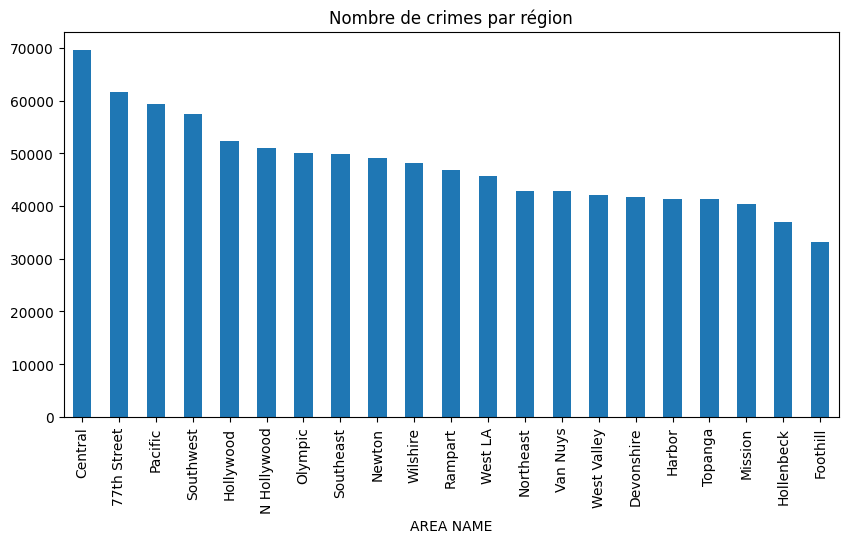

In [29]:
plt.figure(figsize=(10,5))
data['AREA NAME'].value_counts().plot(kind='bar')
plt.title('Nombre de crimes par région')
plt.show()

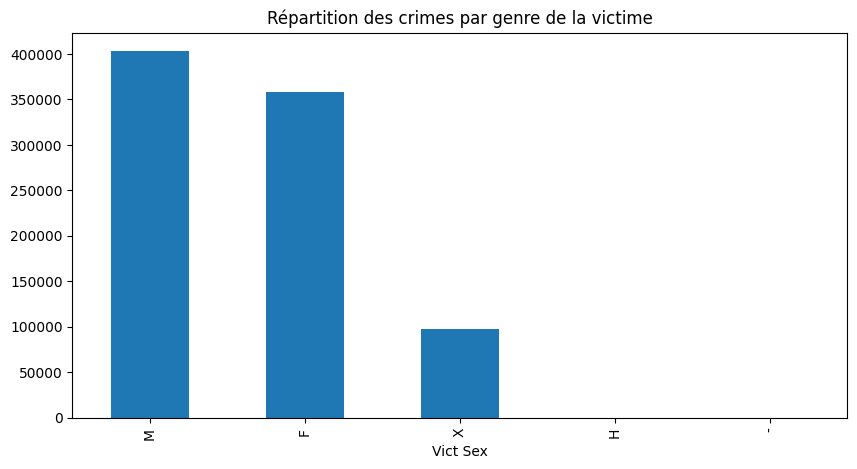

In [30]:
plt.figure(figsize=(10,5))
data['Vict Sex'].value_counts().plot(kind='bar')
plt.title('Répartition des crimes par genre de la victime')
plt.show()

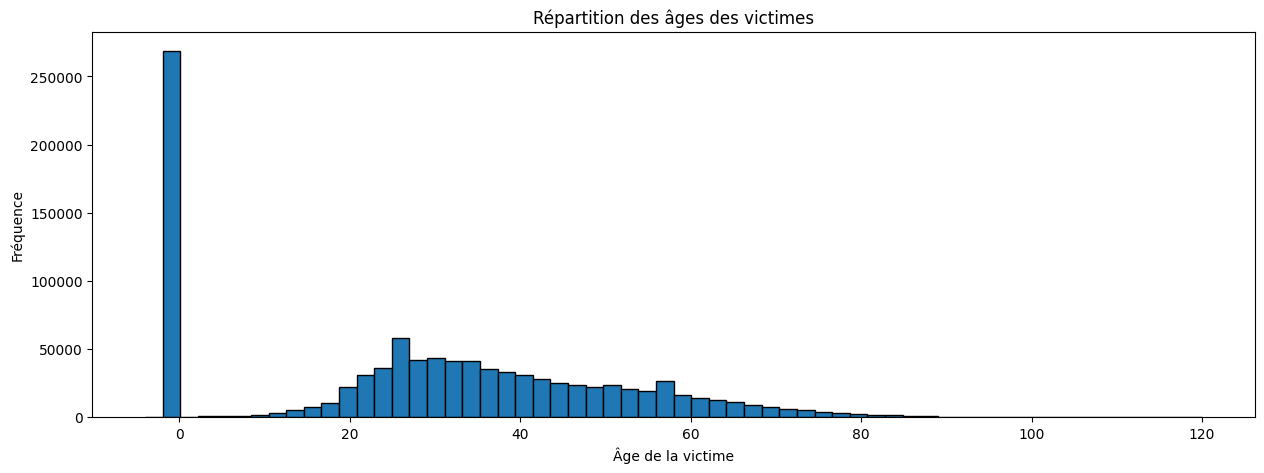

In [31]:
plt.figure(figsize=(15, 5))
plt.hist(data['Vict Age'], bins=60, edgecolor='black')
plt.title('Répartition des âges des victimes')
plt.xlabel('Âge de la victime')
plt.ylabel('Fréquence')
plt.show()

C:\Users\saeru\AppData\Local\Temp\ipykernel_7504\1131048969.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])


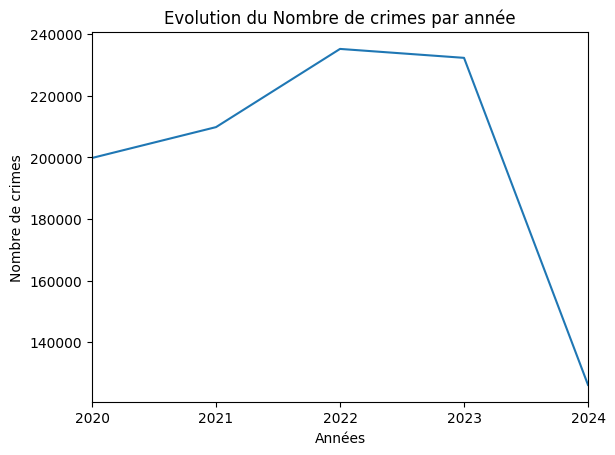

In [52]:
# Ensure 'DATE OCC' is in datetime format
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Set 'DATE OCC' as the index
data.set_index('DATE OCC', inplace=True)

# Resample the data by year and plot
crimes_par_an = data.resample('YE').size()
crimes_par_an.plot()
plt.title('Evolution du Nombre de crimes par année')
plt.xlabel('Années')
plt.ylabel('Nombre de crimes')
plt.show()

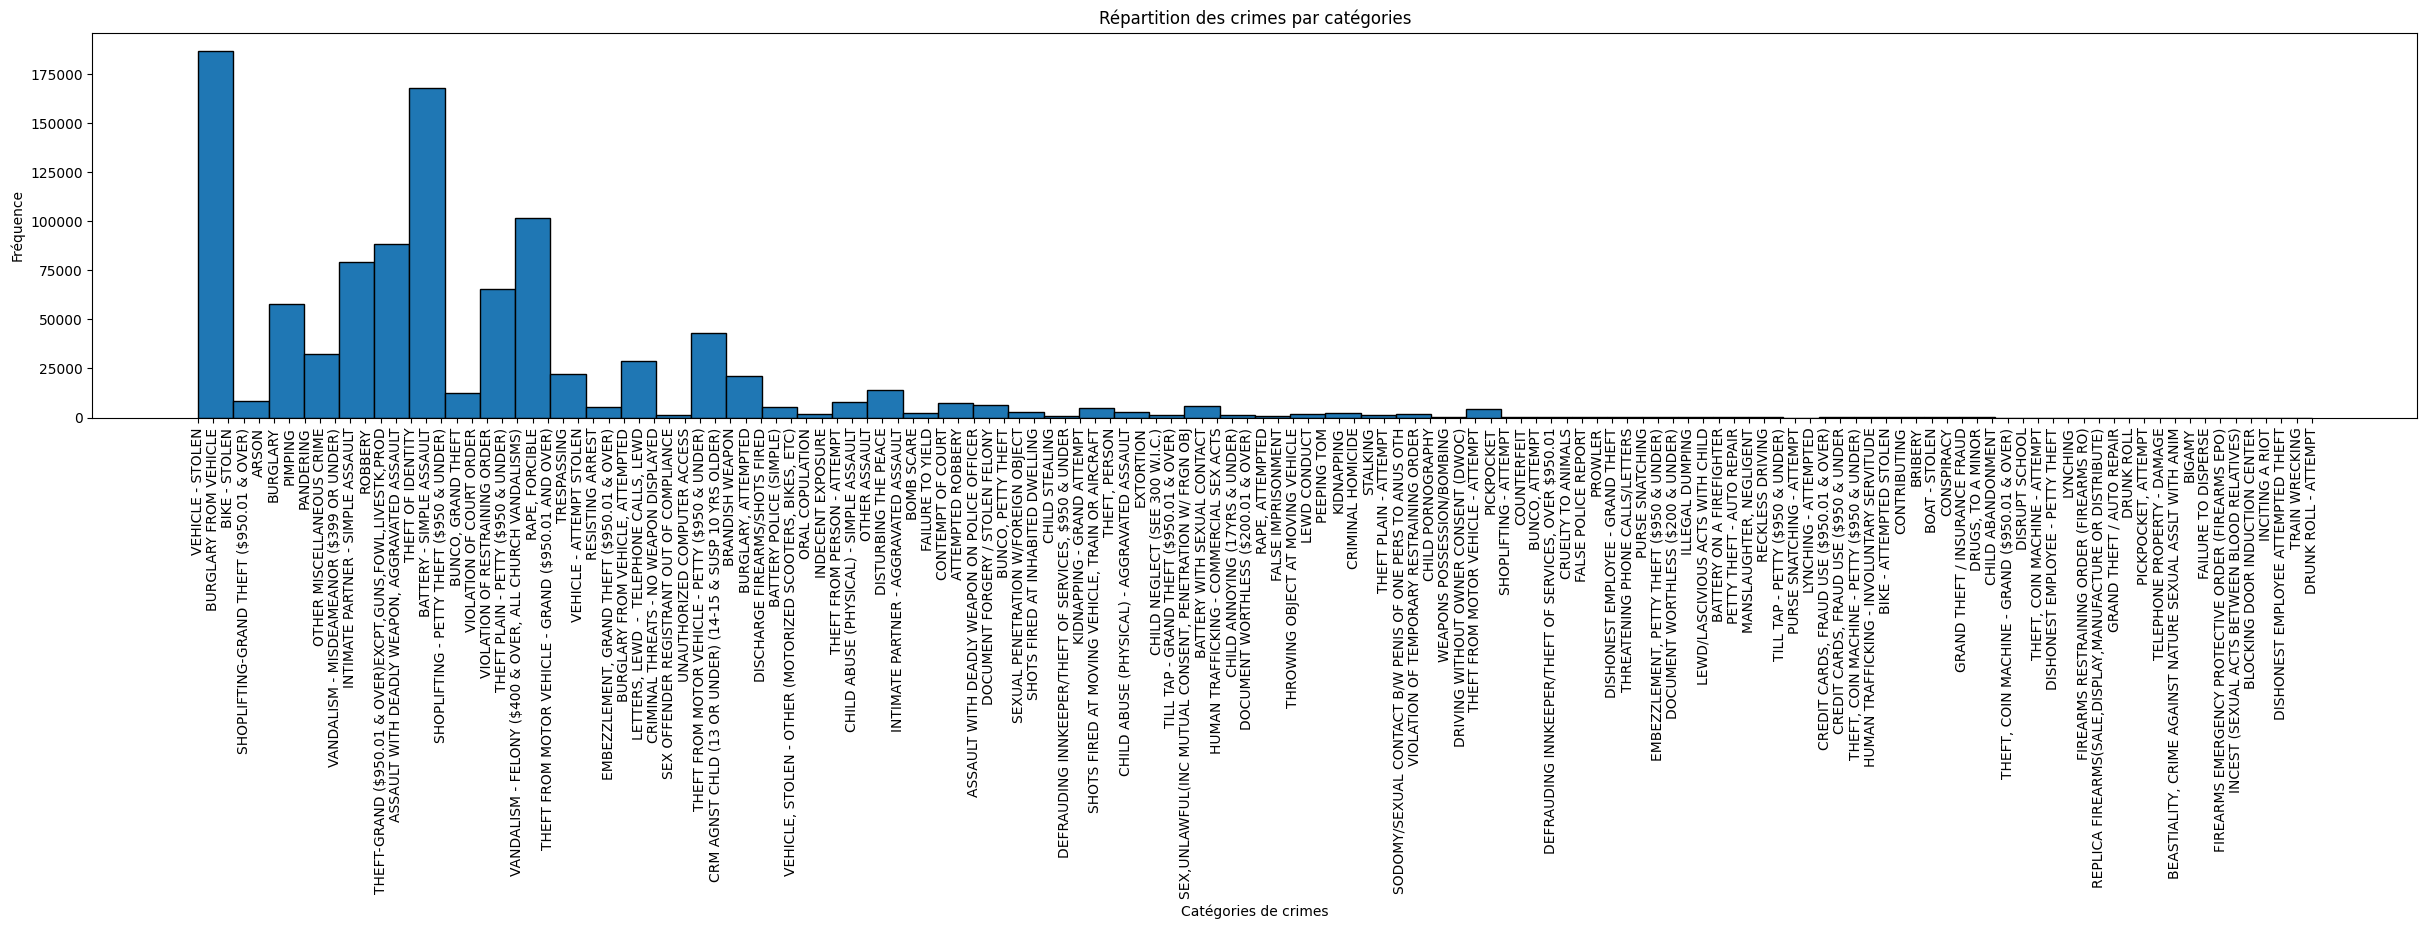

In [61]:
#Répartition des crimes par catégories
plt.figure(figsize=(30, 5))
plt.hist(data['Crm Cd Desc'], bins=60, edgecolor='black')
plt.title('Répartition des crimes par catégories')
plt.xlabel('Catégories de crimes')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x
plt.show()